In [1]:
#Importamos las librerias estandar necesarias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
# Descargamos los datos
url = 'https://drive.google.com/file/d/1lqdL5E3pjC0ISjsEe_F1N8xIKK8y-0nz/view?usp=sharing'
file_id = url.split('/')[-2]
download_url = 'https://drive.google.com/uc?id=' + file_id

df = pd.read_csv(download_url)

# Exploración Inicial

In [6]:
df.head(5)

,id,name,release_date,artists,total_tracks,t_name0,t_name1,t_name2,t_dur0,t_dur1,...,t_val0,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity
0,0,Ya Solo Eres Mi Ex,2021-09-09,"La Adictiva Banda San José de Mesillas,",7,Ya Solo Eres Mi Ex,La Malagueña,México Lindo y Querido,222133,189133.0,...,0.626,0.878,0.833,74.924,126.970,197.836,4.0,3.0,3.0,51
1,1,Nibiru,2019-11-29,"Ozuna,",18,Nibiru,Hasta Que Salga el Sol,Temporal,158826,188480.0,...,0.158,0.598,0.484,173.023,96.042,148.019,4.0,4.0,4.0,67
2,2,DAMN.,2017-04-14,"Kendrick Lamar,",14,BLOOD.,DNA.,YAH.,118066,185946.0,...,0.494,0.422,0.648,156.907,139.913,69.986,4.0,4.0,4.0,81
3,3,Did I Shave My Legs For This?,1996-01-01,"Deana Carter,",11,I've Loved Enough To Know,We Danced Anyway,Count Me In,203693,202533.0,...,0.755,0.651,0.263,120.285,94.054,130.011,4.0,4.0,4.0,53
4,4,glisten,2018-05-04,"Jeremy Zucker,",4,all the kids are depressed,wildfire,glisten (interlude),169973,163000.0,...,0.707,0.426,0.466,103.861,129.170,116.349,4.0,4.0,4.0,70


In [7]:
df.set_index('id')

,name,release_date,artists,total_tracks,t_name0,t_name1,t_name2,t_dur0,t_dur1,t_dur2,...,t_val0,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity
id,,,,,,,,,,,,,,,,,,,,,
0,Ya Solo Eres Mi Ex,2021-09-09,"La Adictiva Banda San José de Mesillas,",7,Ya Solo Eres Mi Ex,La Malagueña,México Lindo y Querido,222133,189133.0,165586.0,...,0.626,0.878,0.8330,74.924,126.970,197.836,4.0,3.0,3.0,51
1,Nibiru,2019-11-29,"Ozuna,",18,Nibiru,Hasta Que Salga el Sol,Temporal,158826,188480.0,238293.0,...,0.158,0.598,0.4840,173.023,96.042,148.019,4.0,4.0,4.0,67
2,DAMN.,2017-04-14,"Kendrick Lamar,",14,BLOOD.,DNA.,YAH.,118066,185946.0,160293.0,...,0.494,0.422,0.6480,156.907,139.913,69.986,4.0,4.0,4.0,81
3,Did I Shave My Legs For This?,1996-01-01,"Deana Carter,",11,I've Loved Enough To Know,We Danced Anyway,Count Me In,203693,202533.0,205373.0,...,0.755,0.651,0.2630,120.285,94.054,130.011,4.0,4.0,4.0,53
4,glisten,2018-05-04,"Jeremy Zucker,",4,all the kids are depressed,wildfire,glisten (interlude),169973,163000.0,89106.0,...,0.707,0.426,0.4660,103.861,129.170,116.349,4.0,4.0,4.0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159995,"Guqin Music ""The Pure Sound of Mountain and Wa...",2009-01-01,"Shuishan Yu,",16,Moon Over the Mountain Pass,The Song of Autumn Wind,Drunken Madness,120160,158173.0,159586.0,...,0.113,0.171,0.0399,113.183,89.293,127.684,4.0,4.0,4.0,28
159996,Jalebi Baby (Tesher x Jason Derulo) [DallasK R...,2021-08-20,"Tesher, Jason Derulo, DallasK,",1,Jalebi Baby (Tesher x Jason Derulo) [DallasK R...,NaN,NaN,161061,NaN,NaN,...,0.721,NaN,NaN,118.084,NaN,NaN,4.0,NaN,NaN,50
159997,Country Again (Side A),2021-04-30,"Thomas Rhett,",11,Want It Again,Growing Up,What’s Your Country Song,172586,181266.0,171333.0,...,0.370,0.561,0.4790,91.250,104.971,174.079,4.0,4.0,4.0,68


In [8]:
df.shape

(160000, 45)

El dataset tiene 160 mil filas y 45 columnas

In [9]:
for col in df.columns:
    print(col)

id
name
release_date
artists
total_tracks
t_name0
t_name1
t_name2
t_dur0
t_dur1
t_dur2
t_dance0
t_dance1
t_dance2
t_energy0
t_energy1
t_energy2
t_key0
t_key1
t_key2
t_mode0
t_mode1
t_mode2
t_speech0
t_speech1
t_speech2
t_acous0
t_acous1
t_acous2
t_ins0
t_ins1
t_ins2
t_live0
t_live1
t_live2
t_val0
t_val1
t_val2
t_tempo0
t_tempo1
t_tempo2
t_sig0
t_sig1
t_sig2
popularity


# Exploración de variables

Queremos explorar la variable target (popularity) y otras variables interesantes (total_tracks, release_date).
Podemos arrancar haciendo un gráfico la distribución de cada variable

Popularity

Text(0.5, 0, 'Frecuencia')

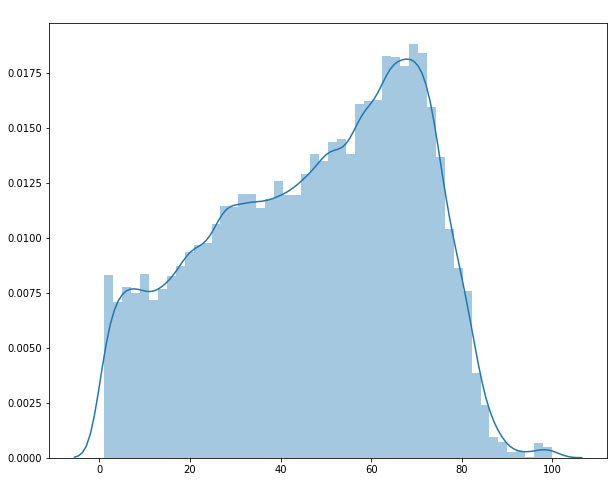

In [10]:
plt.figure(figsize = (10, 8))
fig1 = sns.distplot(df['popularity'], hist = True, axlabel = True, label = 'Distribución de la popularidad en el dataset')
fig1.set_title(label = "Hola", color = 'white')
fig1.set_xlabel(xlabel = "Frecuencia", color = "white")


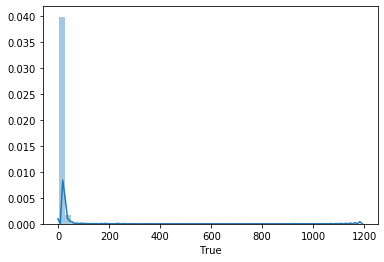

In [11]:
sns.distplot(df['total_tracks'], hist = True, axlabel = True, label = 'Distribución de la cantidad de temas en los albums en el dataset')

In [17]:
df['average_duration'] = ( df['t_dur0'] + df['t_dur1'] + df['t_dur2'] ) / 3

In [18]:
df.head()

,id,name,release_date,artists,total_tracks,t_name0,t_name1,t_name2,t_dur0,t_dur1,...,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity,average_duration
0,0,Ya Solo Eres Mi Ex,2021-09-09,"La Adictiva Banda San José de Mesillas,",7,Ya Solo Eres Mi Ex,La Malagueña,México Lindo y Querido,222133,189133.0,...,0.878,0.833,74.924,126.970,197.836,4.0,3.0,3.0,51,192284.000000
1,1,Nibiru,2019-11-29,"Ozuna,",18,Nibiru,Hasta Que Salga el Sol,Temporal,158826,188480.0,...,0.598,0.484,173.023,96.042,148.019,4.0,4.0,4.0,67,195199.666667
2,2,DAMN.,2017-04-14,"Kendrick Lamar,",14,BLOOD.,DNA.,YAH.,118066,185946.0,...,0.422,0.648,156.907,139.913,69.986,4.0,4.0,4.0,81,154768.333333
3,3,Did I Shave My Legs For This?,1996-01-01,"Deana Carter,",11,I've Loved Enough To Know,We Danced Anyway,Count Me In,203693,202533.0,...,0.651,0.263,120.285,94.054,130.011,4.0,4.0,4.0,53,203866.333333
4,4,glisten,2018-05-04,"Jeremy Zucker,",4,all the kids are depressed,wildfire,glisten (interlude),169973,163000.0,...,0.426,0.466,103.861,129.170,116.349,4.0,4.0,4.0,70,140693.000000


51533
0


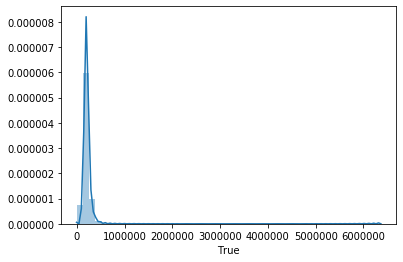

In [38]:
print(df['average_duration'].isna().sum())
series_ohne_na = df['average_duration'].dropna()
print(series_ohne_na.isna().sum())
series_ohne_na = series_ohne_na.astype(int)
sns.distplot(series_ohne_na, hist = True, axlabel = True, label = 'Distribución de la duracion promedio de los temas en el dataset')


Observamos que hay una cantidad alta de valores atípicos, con un group by podemos averiguar que está pasando

In [13]:
df.groupby('total_tracks').count()

,id,name,release_date,artists,t_name0,t_name1,t_name2,t_dur0,t_dur1,t_dur2,...,t_val0,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity
total_tracks,,,,,,,,,,,,,,,,,,,,,
1,47716,47716,47716,47716,47716,0,0,47716,0,0,...,47704,0,0,47704,0,0,47704,0,0,47716
2,3817,3817,3817,3817,3817,3817,0,3817,3817,0,...,3796,3769,0,3796,3769,0,3796,3769,0,3817
3,2426,2426,2426,2426,2426,2426,2426,2426,2426,2426,...,2409,2393,2410,2409,2393,2410,2409,2393,2410,2426
4,2696,2696,2696,2696,2696,2696,2696,2696,2696,2696,...,2680,2678,2678,2680,2678,2678,2680,2678,2678,2696
5,3262,3262,3262,3262,3262,3262,3262,3262,3262,3262,...,3258,3260,3261,3258,3260,3261,3258,3260,3261,3262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
841,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
930,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44


In [14]:
total_tracks_sin_outliers = df[df['total_tracks'] < 100]
total_tracks_sin_outliers.groupby('total_tracks').count()

,id,name,release_date,artists,t_name0,t_name1,t_name2,t_dur0,t_dur1,t_dur2,...,t_val0,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity
total_tracks,,,,,,,,,,,,,,,,,,,,,
1,47716,47716,47716,47716,47716,0,0,47716,0,0,...,47704,0,0,47704,0,0,47704,0,0,47716
2,3817,3817,3817,3817,3817,3817,0,3817,3817,0,...,3796,3769,0,3796,3769,0,3796,3769,0,3817
3,2426,2426,2426,2426,2426,2426,2426,2426,2426,2426,...,2409,2393,2410,2409,2393,2410,2409,2393,2410,2426
4,2696,2696,2696,2696,2696,2696,2696,2696,2696,2696,...,2680,2678,2678,2680,2678,2678,2680,2678,2678,2696
5,3262,3262,3262,3262,3262,3262,3262,3262,3262,3262,...,3258,3260,3261,3258,3260,3261,3258,3260,3261,3262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
95,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
96,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
